# Assignment 5: Block Matching and Harris Corner Detection

### Coded by:

* Ekaterina Melnikova
* Richard Theus

## Ex. 5.1 Dense Optical Flow by Block Matching
* implement the block matching method as shown in the lecture
* take two frames from the datasets "lane_detection" or "copter_flight" with variable distances in time (1, 2, x) and compute the vector flow field
* display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

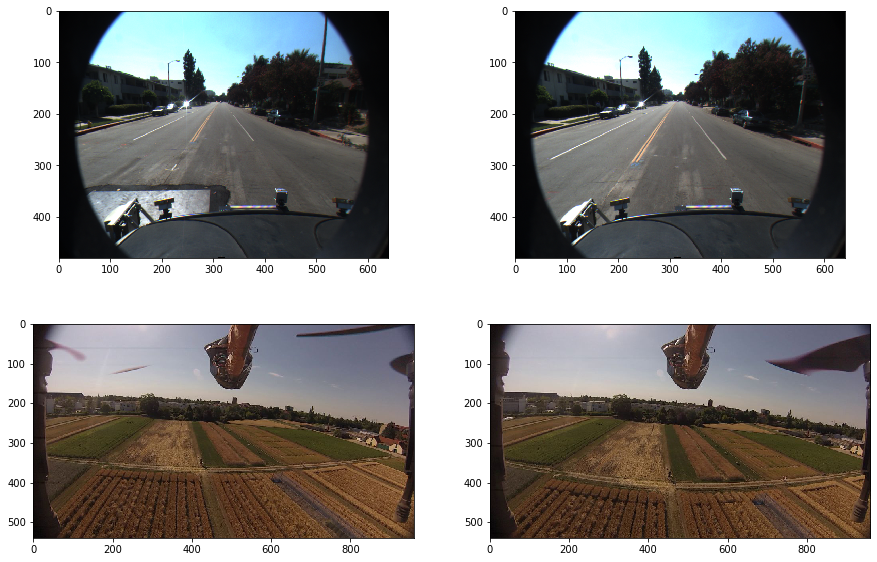

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

# Chose other images if you like
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00001.png')

# Footage from our Neurocopter project:
# http://berlinbiorobotics.blog/projects/neurocopter/
copter1 = io.imread('images/copter_flight/frame050.jpg')
copter2 = io.imread('images/copter_flight/frame052.jpg') 

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax21 = plt.subplot(2, 2, 3)
ax22 = plt.subplot(2, 2, 4)

ax11.imshow(lane1)
ax12.imshow(lane2)

ax21.imshow(copter1)
ax22.imshow(copter2)

In [11]:
def SSD(block_1, block_2):
    s = 0
    for i in range(block_2.shape[0]):
        for j in range(block_2.shape[1]):
            s += (block_1[i][j] - block_2[i][j])**2
    return s

In [12]:
def block_matching(image_1, image_2, size_of_block, size_of_roi_i,  size_of_roi_j):
    plt.figure(figsize=(15, 10))
    for i in range(0, image_1.shape[0], size_of_block):
        for j in range(0, image_1.shape[1], size_of_block):
            block_1 = image_1[i:i+size_of_block, j:j+size_of_block]
            ii1 = int(i+size_of_block/2-size_of_roi_i/2)
            ii2 = int(i+size_of_block/2+size_of_roi_i/2)
            jj1 = int(j+size_of_block/2-size_of_roi_j/2)
            jj2 = int(j+size_of_block/2+size_of_roi_j/2)
            if ii1 < 0:
                ii1 = 0
            if jj1 < 0:
                jj1 = 0
            if ii2 > image_1.shape[0]:
                ii2 = image_1.shape[0] - 1
            if jj2 > image_1.shape[1]:
                jj2 = image_1.shape[0] - 1
            roi = image_2[ii1:ii2, jj1:jj2]
            min_ssd = 100000
            for x in range(0, roi.shape[0], size_of_block): 
                for y in range(0, roi.shape[1], size_of_block):
                    block_2 = roi[x:x+size_of_block, y:y+size_of_block]
                    if SSD(block_1, block_2) < min_ssd:
                        min_ssd = SSD(block_1, block_2)
                        min_x, min_y = x, y
            if min_ssd != 100000:
                plt.arrow(j, i, min_y+jj1-j, min_x+ii1-i, head_width = 3, head_length = 3, color='red', linewidth = 0.1)    
            
    plt.imshow(copter1)
    plt.show()

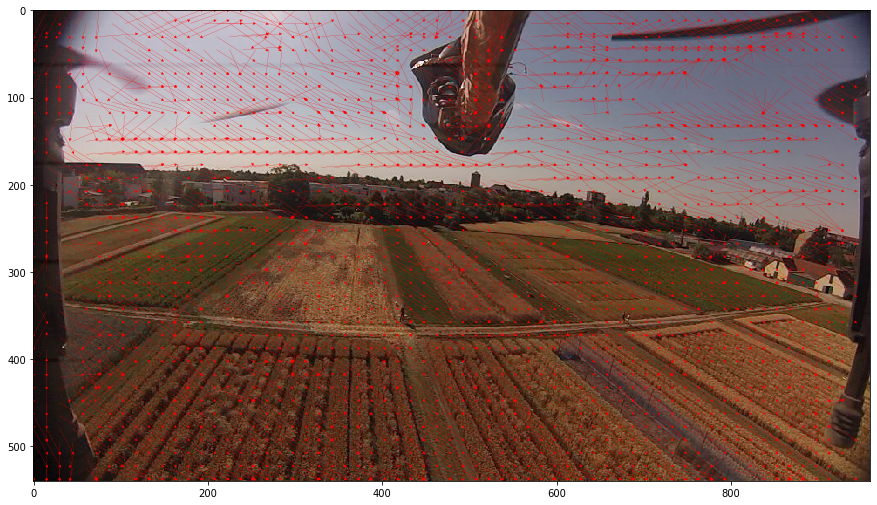

In [13]:
block_matching(color.rgb2gray(copter1), color.rgb2gray(copter2), 15, 50, 80)

## Ex. 5.2 Harris Corner Detection
* implement the Harris Corner Detector as discussed in the lecture
* compute corners in the first image and track them with Lucas-Kanade (use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* mark the positions of your Harris corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the first image (**RESULT**)

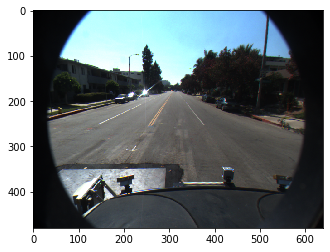

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

image_list = []
for filename in sorted(glob.glob('images/lane_detection/*.png')):
    image_list.append(plt.imread(filename))

img = image_list[0]
plt.imshow(img)
plt.show()

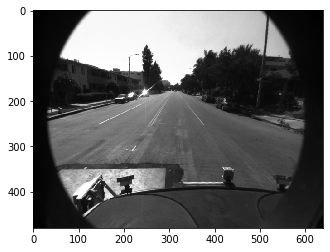

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [16]:
sx = cv2.Sobel(img_gray,cv2.CV_32F,1,0,-1)
sy = cv2.Sobel(img_gray,cv2.CV_32F,0,1,-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


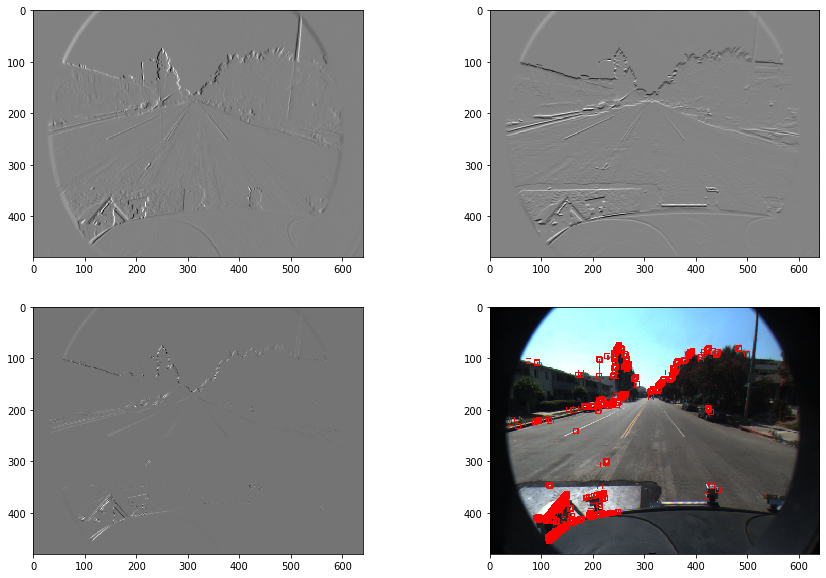

In [21]:
def mult_sobels(sx,sy):
    res = np.zeros(sx.shape)
    for x in range(len(sx)):
        for y in range(len(sx[0])):
            res[x][y] = sx[x][y] * sy[x][y]
    return res

def harris_on_img(img, corners, threshold=1):
    res = img.copy()
    pts = []
    sqs = 5 #square size
    for x in range(len(corners)):
        for y in range(len(corners[0])):
            if corners[x][y]>=threshold:
                pts.append([x,y])
                # draw square
                for i in range(-sqs,sqs+1):
                    for j in range(-sqs,sqs+1):
                        if (i==-sqs or i==sqs) or (j==-sqs or j==sqs) and 0<=x+i<len(img) and 0<=y+j<len(img[0]):
                            od = True
                            res[x+i][y+j][0] = 255
                            res[x+i][y+j][1] = 0
                            res[x+i][y+j][2] = 0
    return res, pts

sobels_1 = mult_sobels(sx,sy)
harris, pts = harris_on_img(img,sobels_1)
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
ax1.imshow(sx, cmap="gray")
ax2.imshow(sy, cmap="gray")
ax3.imshow(sobels_1, cmap="gray")
ax4.imshow(harris)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


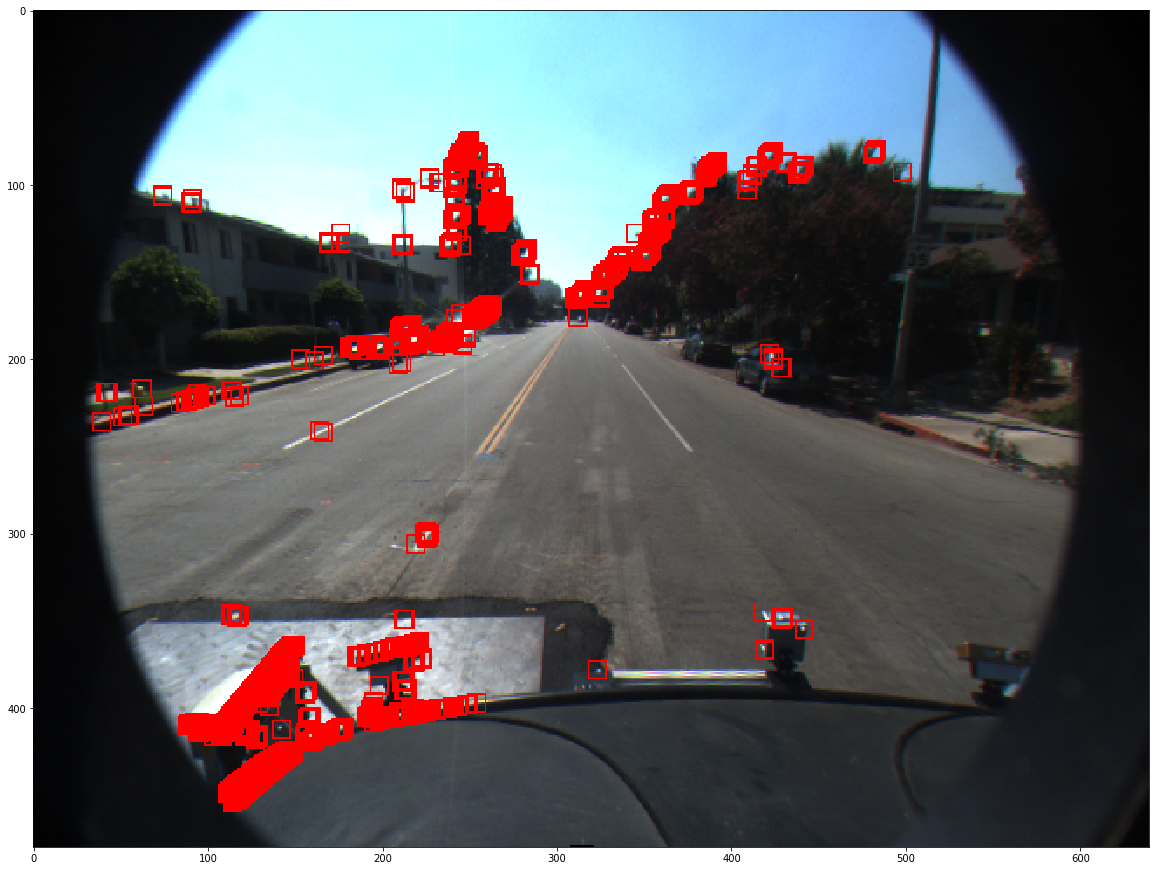

In [22]:
fig = plt.figure(figsize=(20,20))
plt.imshow(harris)